# Task : Predicting Restaurant Ratings

### Objective:
#### To build a machine learning model to predict the aggregate rating of a restaurant based on features.

### Steps:
#### 1. Preprocess the dataset by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.
#### 2. Select a regression algorithm (e.g., linear regression, decision tree regression) and train it on the training data.
#### 3. Evaluate the model's performance using appropriate regression metrics (e.g., mean squared error, R-squared) on the testing data.
####  4. Interpret the model's results and analyze the most influential features affecting restaurant ratings.

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
data = pd.read_csv("Dataset .csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
data.isnull().sum() #checking for null values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
data = data.dropna()  #removes null value rows

### Dropping Unecessary columns

In [3]:
columns_to_drop = [
    'Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 
    'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 
    'Currency', 'Switch to order menu', 'Rating color'
]
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9551 non-null   int64  
 1   Has Table booking     9551 non-null   object 
 2   Has Online delivery   9551 non-null   object 
 3   Is delivering now     9551 non-null   object 
 4   Price range           9551 non-null   int64  
 5   Aggregate rating      9551 non-null   float64
 6   Rating text           9551 non-null   object 
 7   Votes                 9551 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 597.1+ KB


### Visualization

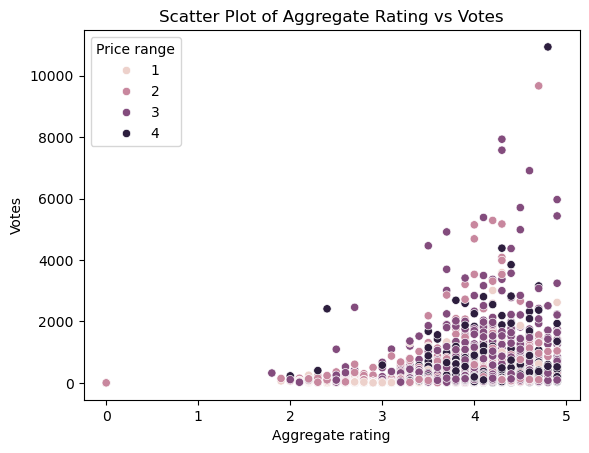

In [5]:
sns.scatterplot(x=data["Aggregate rating"], y=data["Votes"], hue=data["Price range"])
plt.title('Scatter Plot of Aggregate Rating vs Votes')
plt.show()

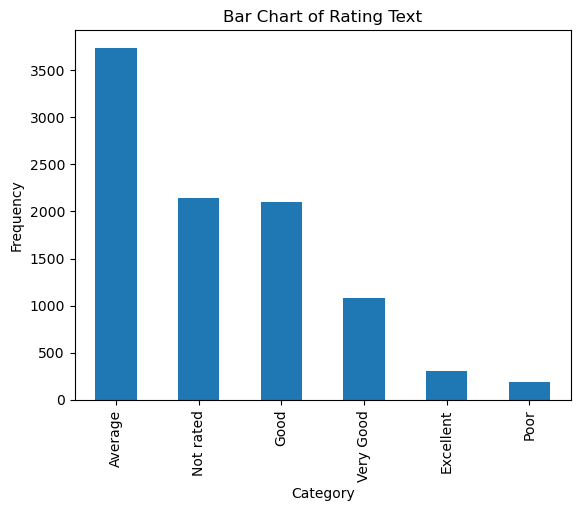

In [6]:
data['Rating text'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar Chart of Rating Text')
plt.show()

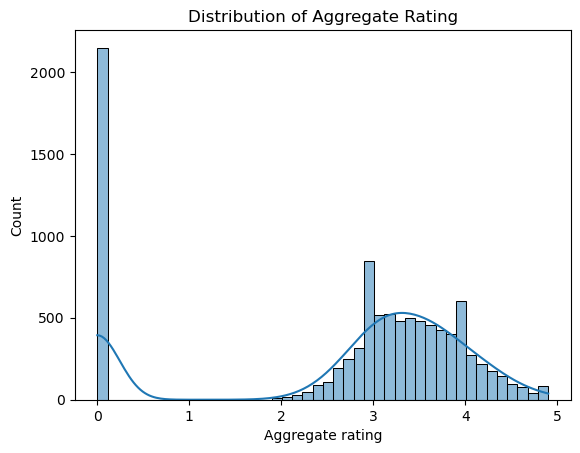

In [7]:
sns.histplot(data['Aggregate rating'], kde=True)
plt.title('Distribution of Aggregate Rating')
plt.show()

In [8]:
# Unique values in categorical columns
for col in ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating text']:
    print(f"{col} unique values: {data[col].unique()}\n")

Has Table booking unique values: ['Yes' 'No']

Has Online delivery unique values: ['No' 'Yes']

Is delivering now unique values: ['No' 'Yes']

Rating text unique values: ['Excellent' 'Very Good' 'Good' 'Average' 'Not rated' 'Poor']



In [11]:
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()
for col in ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating text']:
    data_encoded[col] = LabelEncoder().fit_transform(data[col])

# Check unique values after encoding
for col in ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating text']:
    print(f"{col} encoded unique values: {data_encoded[col].unique()}\n")

Has Table booking encoded unique values: [1 0]

Has Online delivery encoded unique values: [0 1]

Is delivering now encoded unique values: [0 1]

Rating text encoded unique values: [1 5 2 0 3 4]



### Correlation matrix

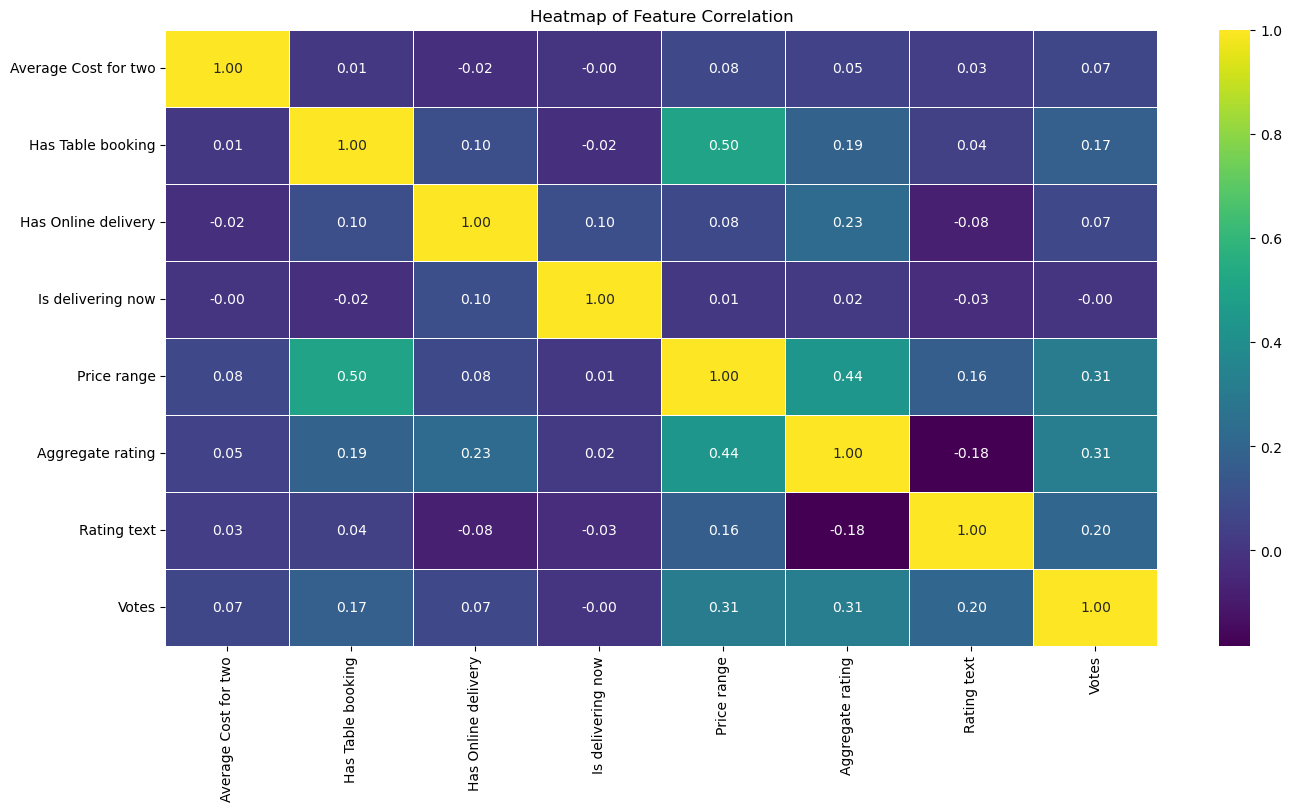

In [12]:
plt.figure(figsize=(16, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap="viridis", fmt='.2f', linewidths=.5)
plt.title('Heatmap of Feature Correlation')
plt.show()

### Splitting Data into Independent and Dependent Variables

In [13]:
X = data_encoded.drop('Aggregate rating', axis=1)
y = data_encoded['Aggregate rating']

# Splitting Data into Train and Test sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Model

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [15]:
# Evaluate the Model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display Results
results = pd.DataFrame({
    'Method': ['Linear Regression'],
    'Training MSE': [train_mse],
    'Test MSE': [test_mse],
    'Test MAE': [test_mae],
    'Test R^2': [test_r2]
})
results

,Method,Training MSE,Test MSE,Test MAE,Test R^2
0,Linear Regression,1.519452,1.510543,1.018297,0.336349
